<a href="https://colab.research.google.com/github/Divyam-Deep/Asteroid-EDA/blob/main/Asteroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Working on the Asteroid Data

In [ ]:
#impoarting all the datas from the kaggle to colab without downloading
import pandas as pd
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sakhawat18/asteroid-dataset")

# loading the csv's
data = pd.read_csv(os.path.join(path, "dataset.csv"))

100%|██████████| 182M/182M [00:02<00:00, 67.2MB/s]

Extracting files...



<ipython-input-1-be99f1a8f7a2>:10: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, "dataset.csv"))


##Cleaning the data

In [ ]:
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
data.shape

(958524, 45)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [ ]:
data.isnull().sum()

,0
id,0
spkid,0
full_name,0
pdes,0
name,936460
prefix,958506
neo,4
pha,19921
H,6263
diameter,822315


In [ ]:
958506/958524 #hence this is the prefix part with 99% null values and its not important to my analysis so i can remove this

0.9999812211274836

In [ ]:
data.drop('prefix',axis=1,inplace=True)

In [ ]:
936460/958534 #see as it is 99% null values but still the names are important in my analysis so i will replace the null values with the "Unknown"

0.9769710829245494

In [ ]:
data['name'].fillna('Unknown',inplace=True)

<ipython-input-14-124b103c2ccb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['name'].fillna('Unknown',inplace=True)


In [ ]:
data.tail(20)

,id,spkid,full_name,pdes,name,neo,pha,H,diameter,albedo,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
958504,bK20K04E,54017215,(2020 KE4),2020 KE4,Unknown,Y,N,25.409,NaN,NaN,...,0.005393,0.002628,0.004934,0.025682,3.906900e-03,7.988600e-04,0.005606,1.970200,APO,0.45454
958505,bK20K04F,54017216,(2020 KF4),2020 KF4,Unknown,Y,N,24.371,NaN,NaN,...,0.286690,0.010582,0.007101,0.206910,1.309500e-03,2.062400e-03,0.376590,0.490380,ATE,0.34056
958506,bK20K04G,54017223,(2020 KG4),2020 KG4,Unknown,Y,N,24.980,NaN,NaN,...,0.018456,0.002665,0.012761,0.009878,3.388600e-02,2.290700e-03,0.010086,19.240000,AMO,0.47456
958507,bK20K04J,54017225,(2020 KJ4),2020 KJ4,Unknown,Y,N,29.913,NaN,NaN,...,0.000674,0.000365,0.053168,0.062923,1.276800e-04,1.763400e-04,0.045371,0.060834,ATE,0.44725
958508,bK20K04K,54017228,(2020 KK4),2020 KK4,Unknown,Y,N,26.141,NaN,NaN,...,0.005783,0.001141,0.003870,0.037536,2.922200e-03,9.493700e-04,0.013315,1.452700,APO,0.63662
958509,bK20K04L,54017227,(2020 KL4),2020 KL4,Unknown,Y,N,24.081,NaN,NaN,...,0.050186,0.000247,0.041843,0.096505,4.314800e-03,1.468300e-03,0.048864,2.259900,AMO,0.89582
958510,bK20K04M,54017229,(2020 KM4),2020 KM4,Unknown,Y,N,27.898,NaN,NaN,...,0.009403,0.000130,0.000195,0.016399,7.111300e-04,4.711000e-04,0.005509,0.359240,APO,0.42725
958511,bK20K04N,54017231,(2020 KN4),2020 KN4,Unknown,Y,N,21.510,NaN,NaN,...,0.188380,0.015119,0.335950,0.485930,3.247500e-03,3.217500e-03,0.237400,1.417300,APO,0.25400
958512,bK20K04O,54017230,(2020 KO4),2020 KO4,Unknown,Y,N,26.980,NaN,NaN,...,0.004373,0.000994,0.003949,0.038764,7.274300e-03,9.828000e-04,0.008769,3.749500,APO,0.61686
958513,bK20K04Q,54017232,(2020 KQ4),2020 KQ4,Unknown,Y,N,26.419,NaN,NaN,...,0.021693,0.002847,0.035812,0.097113,4.535000e-04,5.053900e-04,0.065993,0.226270,APO,0.45051


In [ ]:
#now lets work on neo ( near earth object ) we can fill this value using mode as they are in binary
data['neo'].fillna(data['neo'].mode()[0], inplace=True)

<ipython-input-19-518ea79e1974>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['neo'].fillna(data['neo'].mode()[0], inplace=True)


In [ ]:
data.isnull().sum()

,0
id,0
spkid,0
full_name,0
pdes,0
name,0
neo,0
pha,19921
H,6263
diameter,822315
albedo,823421


In [ ]:
#now lets work for the pha (Potentially Hazardous Asteroid) which means those asteroids which can be a threat to the earth and in this also we can use the mode
data['pha'].fillna(data['pha'].mode()[0], inplace=True)

<ipython-input-21-a3f255897412>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pha'].fillna(data['pha'].mode()[0], inplace=True)


In [ ]:
#now lets work on the H (Absolute Magnitude). to till the null value we can use the median which will be more suitable than using mean or mode
data['H'].fillna(data['H'].median(), inplace=True)

<ipython-input-22-957203bcacff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['H'].fillna(data['H'].median(), inplace=True)


In [ ]:
data['albedo'].head()

,albedo
0,0.0900
1,0.1010
2,0.2140
3,0.4228
4,0.2740


In [ ]:
#fixing diameter, albedo (The reflectivity of the asteroid’s surface (ranges from 0 to 1)) and diameter_sigma (The uncertainty or error range in the diameter measurement.) by filling with the mean values
data['diameter'].fillna(data['diameter'].mean(), inplace=True)
data['albedo'].fillna(data['albedo'].mean(), inplace=True)
data['diameter_sigma'].fillna(data['diameter_sigma'].mean(), inplace=True)

<ipython-input-24-03eaffde9713>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diameter'].fillna(data['diameter'].mean(), inplace=True)
<ipython-input-24-03eaffde9713>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
data.isnull().sum()

,0
id,0
spkid,0
full_name,0
pdes,0
name,0
neo,0
pha,0
H,0
diameter,0
albedo,0


In [ ]:
#now for ma, ad, per, per_y and rms we can drop those null values as they are very small
data.dropna(subset=['ma', 'ad', 'per', 'per_y', 'rms'], inplace=True)

In [ ]:
data.isnull().sum()

,0
id,0
spkid,0
full_name,0
pdes,0
name,0
neo,0
pha,0
H,0
diameter,0
albedo,0


In [ ]:
data[['moid','moid_ld']].head()

,moid,moid_ld
0,1.59478,620.640533
1,1.23429,480.348639
2,1.03429,402.514639
3,1.13948,443.451432
4,1.09575,426.433027


In [ ]:
#now working on moid(Minimum Orbit Intersection Distance) and moid_ld(Minimum Orbit Intersection Distance in Lunar Distance) but substituting the median to overcome the outliers
data['moid'].fillna(data['moid'].median(), inplace=True)
data['moid_ld'].fillna(data['moid_ld'].median(), inplace=True)


<ipython-input-32-29ff55375a63>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['moid'].fillna(data['moid'].median(), inplace=True)
<ipython-input-32-29ff55375a63>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
data.isnull().sum()

,0
id,0
spkid,0
full_name,0
pdes,0
name,0
neo,0
pha,0
H,0
diameter,0
albedo,0


In [ ]:
#now lets talk about the sigma_e(Eccentricity Uncertainty), sigma_a (Semi-major Axis Uncertainty), sigma_q (Perihelion Distance Uncertainty), sigma_i (Inclination Uncertainty), sigma_om (Longitude of Ascending Node Uncertainty), sigma_w (Argument of Perihelion Uncertainty), sigma_ma (Mean Anomaly Uncertainty), sigma_ad (Aphelion Distance Uncertainty), sigma_n (Orbital Period Uncertainty), sigma_tp (Time of Perihelion Passage Uncertainty), sigma_per (Orbital Period in Years Uncertainty)
#these all are realted to the orbit and longitued and latitude which is very crucial and best way to fix this is by using the median (mean can affect this)
columns = [
    'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
    'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'
]

for col in columns:
    data[col].fillna(data[col].median(), inplace=True)

<ipython-input-34-19780b2415a4>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
data.isnull().sum()

,0
id,0
spkid,0
full_name,0
pdes,0
name,0
neo,0
pha,0
H,0
diameter,0
albedo,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958517 entries, 0 to 958523
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958517 non-null  object 
 1   spkid           958517 non-null  int64  
 2   full_name       958517 non-null  object 
 3   pdes            958517 non-null  object 
 4   name            958517 non-null  object 
 5   neo             958517 non-null  object 
 6   pha             958517 non-null  object 
 7   H               958517 non-null  float64
 8   diameter        958517 non-null  float64
 9   albedo          958517 non-null  float64
 10  diameter_sigma  958517 non-null  float64
 11  orbit_id        958517 non-null  object 
 12  epoch           958517 non-null  float64
 13  epoch_mjd       958517 non-null  int64  
 14  epoch_cal       958517 non-null  float64
 15  equinox         958517 non-null  object 
 16  e               958517 non-null  float64
 17  a              

In [ ]:
data.head()

,id,spkid,full_name,pdes,name,neo,pha,H,diameter,albedo,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,N,N,3.40,939.400,0.0900,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,N,N,4.20,545.000,0.1010,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,N,N,5.33,246.596,0.2140,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,N,N,3.00,525.400,0.4228,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,N,N,6.90,106.699,0.2740,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


##Looking for the Statistics of data

In [ ]:
#Numerical Statistics
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585170e+05,958517.000000,958517.000000,958517.000000,958517.000000,9.585170e+05,958517.000000,9.585170e+05,958517.000000,958517.000000,...,9.585170e+05,9.585170e+05,9.585170e+05,9.585170e+05,9.585170e+05,9.585170e+05,9.585170e+05,9.585170e+05,9.585170e+05,958517.000000
mean,3.810117e+06,16.906414,5.506429,0.130627,0.479184,2.458869e+06,58868.827822,2.019693e+07,0.156112,2.925265,...,1.941689e+01,1.144151e+00,5.199301e+00,4.188059e+05,4.187233e+05,2.086778e+01,4.955025e-02,1.246597e+08,8.347213e+04,0.561154
std,6.831566e+06,1.784399,3.552962,0.041419,0.294986,7.009813e+02,700.981321,1.928457e+04,0.092612,35.958048,...,2.873463e+03,1.268841e+02,1.319457e+03,7.229513e+07,7.228895e+07,7.121860e+03,9.712459e+00,2.164019e+10,2.738772e+07,2.745707
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,0.555418,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239631e+06,16.100000,5.506429,0.130627,0.479184,2.459000e+06,59000.000000,2.020053e+07,0.092192,2.387836,...,1.475300e-07,6.141700e-06,3.667500e-05,5.829300e-05,2.608400e-05,2.373600e-08,2.800200e-09,1.127500e-04,1.821000e-05,0.518040
50%,2.479260e+06,16.900000,5.506429,0.130627,0.479184,2.459000e+06,59000.000000,2.020053e+07,0.145001,2.646969,...,2.271900e-07,8.688800e-06,6.642500e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752516e+06,17.700000,5.506429,0.130627,0.479184,2.459000e+06,59000.000000,2.020053e+07,0.200649,3.001932,...,6.182900e-07,1.552900e-05,1.565700e-04,2.971300e-04,1.621300e-04,1.140200e-07,1.074800e-08,7.691100e-04,9.336100e-05,0.613930
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,0.999851,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,3.340000e+10,3.339300e+10,5.509700e+06,7.698800e+03,1.041500e+13,1.910700e+10,2686.600000


In [ ]:
data.rename(columns={'class': 'class_name'}, inplace=True)

In [ ]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per',
       'class_name', 'rms'],
      dtype='object')

In [ ]:
#Categorical Statistics

columns = ['id', 'full_name', 'pdes', 'name', 'neo', 'pha', 'equinox', 'class_name']
for col in columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")


Value counts for id:
id
bT3S2678    1
a0000001    1
a0000002    1
a0000003    1
a0000004    1
           ..
a0000010    1
a0000009    1
a0000008    1
a0000007    1
a0000006    1
Name: count, Length: 958517, dtype: int64


Value counts for full_name:
full_name
   (2678 T-3)    1
 1 Ceres         1
 2 Pallas        1
 3 Juno          1
 4 Vesta         1
                ..
10 Hygiea        1
 9 Metis         1
 8 Flora         1
 7 Iris          1
 6 Hebe          1
Name: count, Length: 958517, dtype: int64


Value counts for pdes:
pdes
2678 T-3    1
1           1
2           1
3           1
4           1
           ..
10          1
9           1
8           1
7           1
6           1
Name: count, Length: 958517, dtype: int64


Value counts for name:
name
Unknown        936455
Dusser              1
Kurosaki            1
Delibes             1
Ibuki               1
                ...  
Bolotov             1
Lagerros            1
Viktorbykov         1
Tagore              1
Sicoli       

##Data Distribution Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to visualize
num_cols = ['H', 'diameter', 'albedo', 'moid', 'e', 'a', 'q', 'i', 'per']

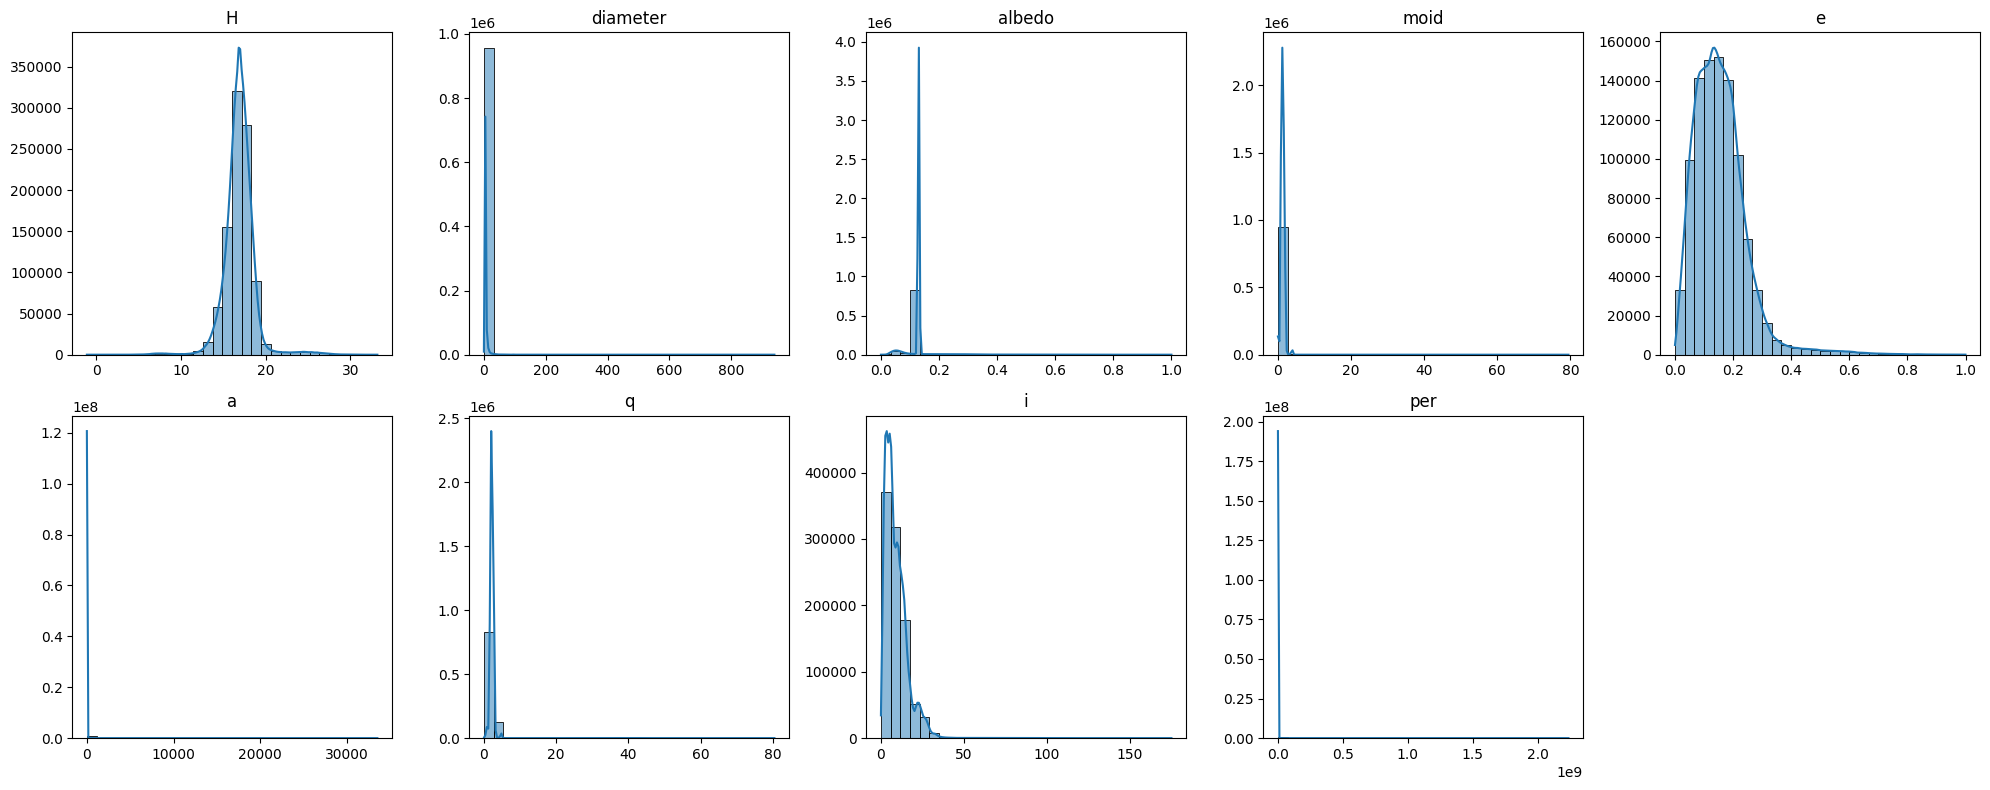

In [ ]:
# Histograms
# Split into two rows
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows x 5 columns

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
#hide an extra blank map
if len(axes) > len(num_cols):
    axes[len(num_cols)].set_visible(False)

plt.tight_layout()
plt.show()

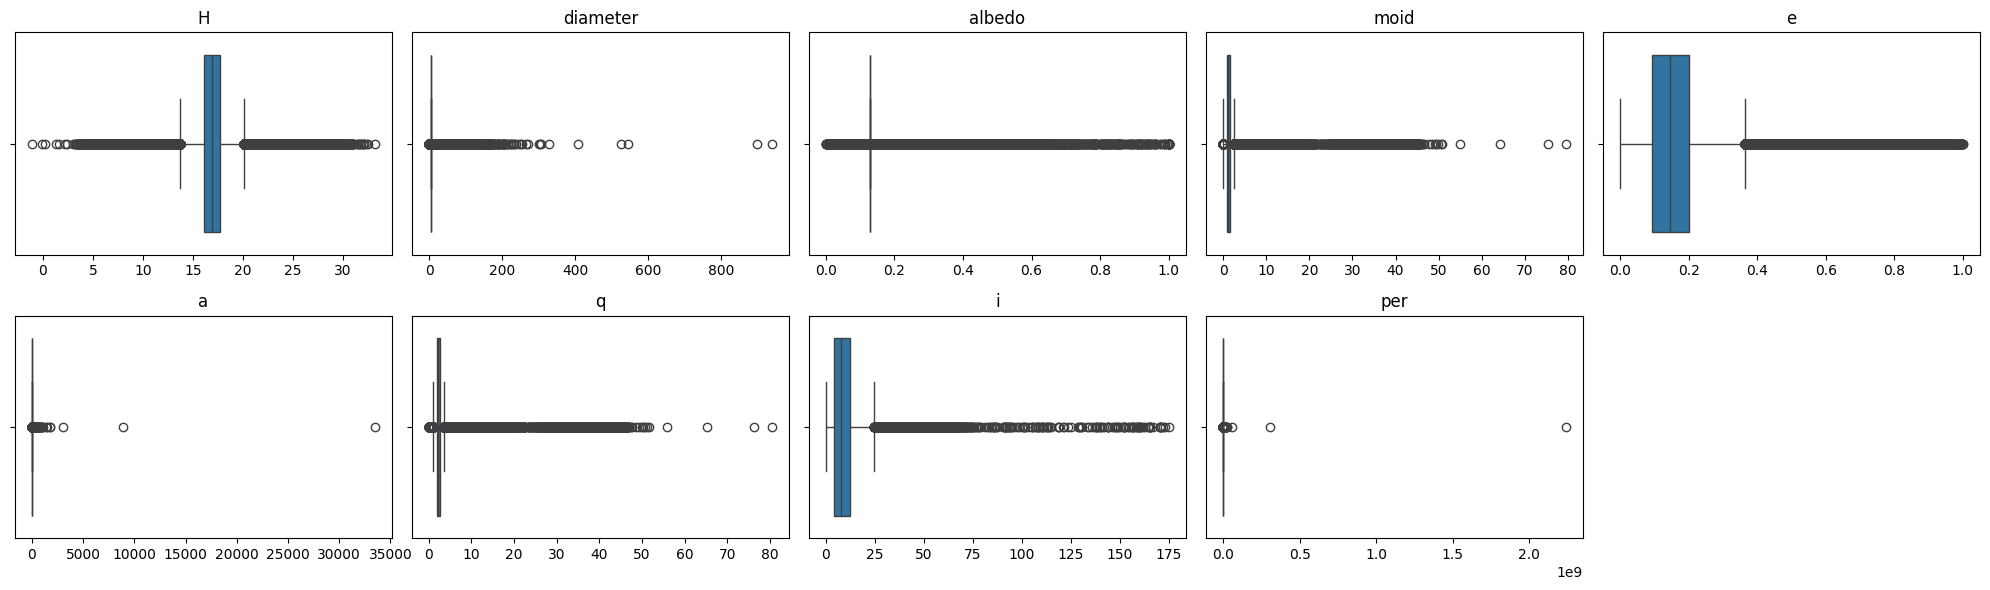

In [ ]:
# Create subplots: 2 rows, 5 columns = 10 total (1 extra)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.flatten()

# Plot only the actual columns
for i, col in enumerate(num_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide the extra subplot (10th one)
if len(axes) > len(num_cols):
    axes[len(num_cols)].set_visible(False)

plt.tight_layout()
plt.show()

##Correlation Analysis

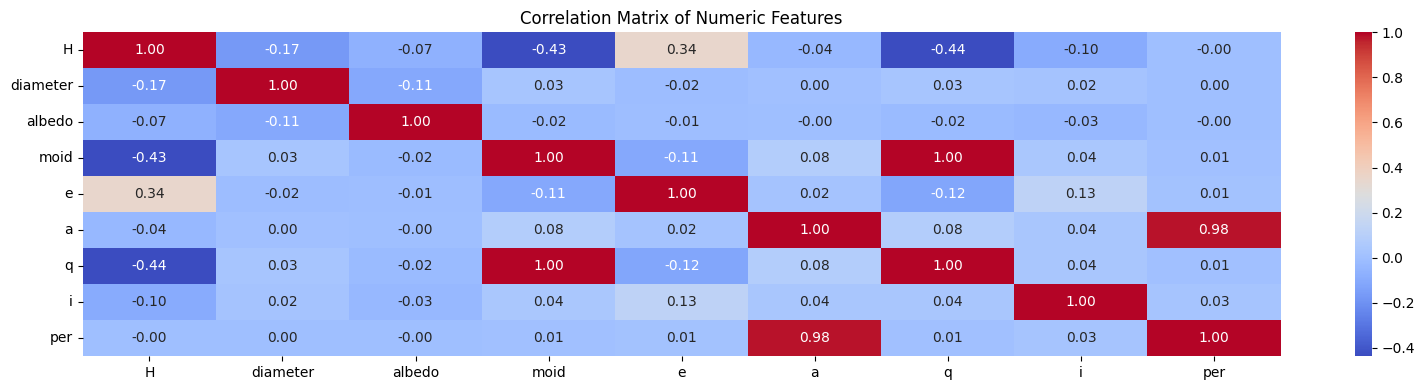

In [ ]:
# Compute the correlation matrix
corr_matrix = data[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(16, 4))  # Wide and short for a horizontal look
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##Detecting Outliers

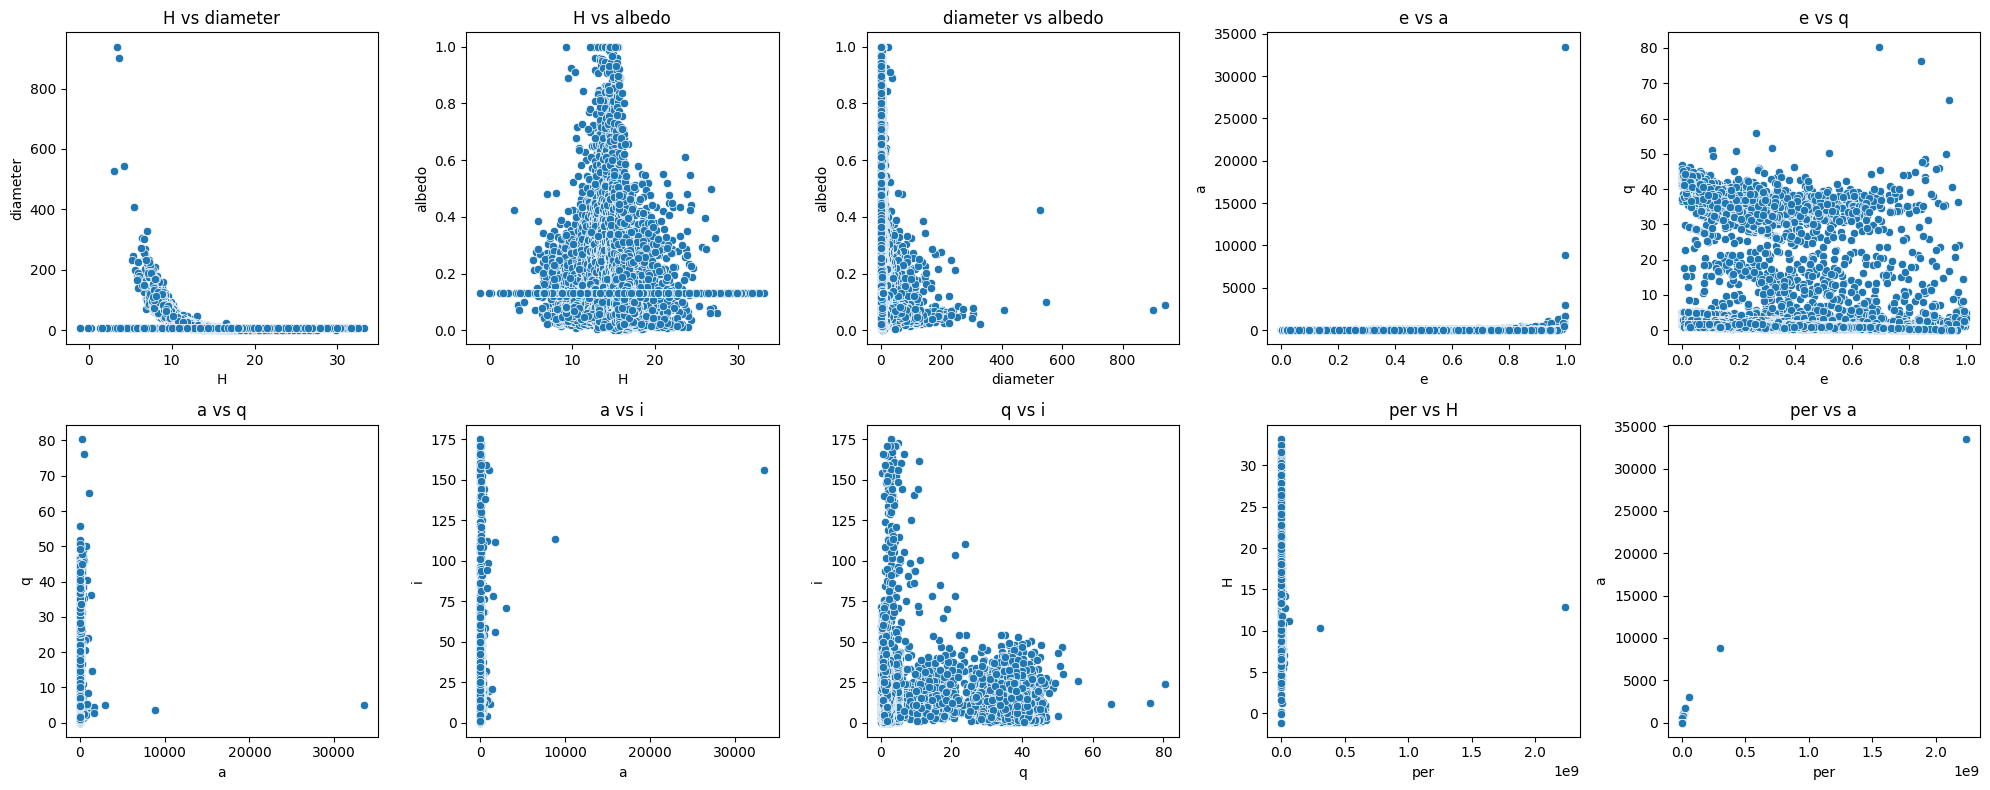

In [ ]:
important_pairs = [
    ('H', 'diameter'),
    ('H', 'albedo'),
    ('diameter', 'albedo'),
    ('e', 'a'),
    ('e', 'q'),
    ('a', 'q'),
    ('a', 'i'),
    ('q', 'i'),
    ('per', 'H'),
    ('per', 'a')
]

# Set up the subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows x 5 columns
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each important pair and create scatter plots
for index, (col1, col2) in enumerate(important_pairs):
    sns.scatterplot(x=data[col1], y=data[col2], ax=axes[index])
    axes[index].set_title(f'{col1} vs {col2}')
    axes[index].set_xlabel(col1)
    axes[index].set_ylabel(col2)

# Hide extra axes if there are any
for i in range(len(important_pairs), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()

##Class Distribution

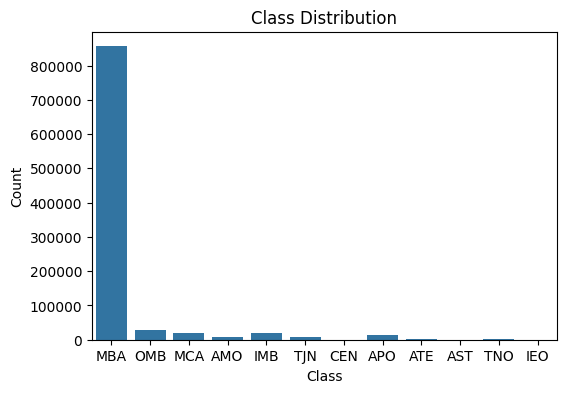

In [ ]:
# Class Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x=data['class_name'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()